In [11]:
# Dependencies
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

from keras import models
from keras import layers
from keras.optimizers import SGD

import matplotlib.pyplot as plt

import numpy as np

In [2]:
# make the dataset
# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X, y = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

In [3]:
print(type(X), X.shape)
print(type(y), y.shape)
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

<class 'numpy.ndarray'> (1000, 2)
<class 'numpy.ndarray'> (1000,)
First 5 X features:
[[-8.41339595  6.93516545]
 [-5.76648413 -6.43117072]
 [-6.04213682 -6.76610151]
 [ 3.95083749  0.69840313]
 [ 4.25049181 -0.28154475]]

First 5 y labels:
[3 2 2 1 1]


In [4]:
# Make DataFrame of circle data
import pandas as pd

circles = pd.DataFrame({
    "X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,-8.413396,6.935165,3
1,-5.766484,-6.431171,2
2,-6.042137,-6.766102,2
3,3.950837,0.698403,1
4,4.250492,-0.281545,1
5,-6.794108,-6.477221,2
6,5.210176,2.889048,1
7,-5.505136,-6.360377,2
8,-6.543756,-4.833899,2
9,6.449642,0.747766,1


In [5]:
# Check different labels
print(circles.label.value_counts())

label
3    250
2    250
1    250
0    250
Name: count, dtype: int64


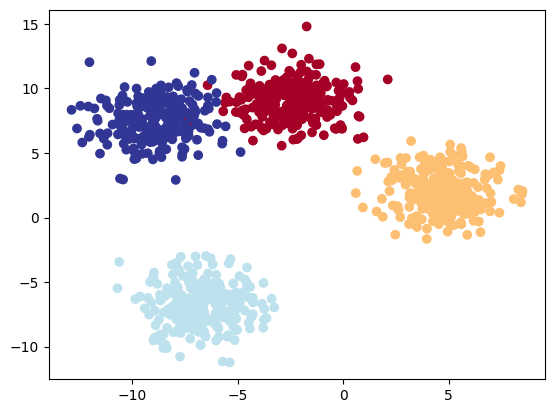

In [6]:
# plot the data
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [7]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=RANDOM_SEED) # make the random split reproducible

In [8]:
print(type(X_train), X_train.shape)
print(type(y_train), y_train.shape)
print(X_train[:5])
print(y_train[:5])

<class 'numpy.ndarray'> (800, 2)
<class 'numpy.ndarray'> (800,)
[[ 5.04045424  3.30761588]
 [-2.62485019  9.52601409]
 [-8.52403982 -9.04018592]
 [-6.02615257 -4.43751466]
 [-3.33967158  7.21746929]]
[1 0 2 2 0]


In [9]:
# Building a model
# Build a multi-class classification model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(NUM_FEATURES,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 4)                 68        
                                                                 
Total params: 388 (1.52 KB)
Trainable params: 388 (1.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Compile the model
optimizer = SGD(learning_rate=0.1)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
from tensorflow.keras.utils import to_categorical

one_hot_y_train = to_categorical(y_train)
one_hot_y_test = to_categorical(y_test)

In [23]:
print(y_train[:5])
print(one_hot_y_train[:5])

[1 0 2 2 0]
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]


In [25]:
# training data
partial_x_train = X_train
partial_y_train = one_hot_y_train

x_val = X_test
y_val = one_hot_y_test

In [26]:
# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4370 - accuracy: 0.8950 - val_loss: 0.0670 - val_accuracy: 0.9900
Epoch 2/100
25/25 [==============================] - 0s 984us/step - loss: 0.0586 - accuracy: 0.9862 - val_loss: 0.0325 - val_accuracy: 0.9950
Epoch 3/100
25/25 [==============================] - 0s 927us/step - loss: 0.0573 - accuracy: 0.9812 - val_loss: 0.0243 - val_accuracy: 1.0000
Epoch 4/100
25/25 [==============================] - 0s 976us/step - loss: 0.0385 - accuracy: 0.9887 - val_loss: 0.0234 - val_accuracy: 0.9950
Epoch 5/100
25/25 [==============================] - 0s 935us/step - loss: 0.0351 - accuracy: 0.9862 - val_loss: 0.0176 - val_accuracy: 0.9950
Epoch 6/100
25/25 [==============================] - 0s 925us/step - loss: 0.0621 - accuracy: 0.9787 - val_loss: 0.0157 - val_accuracy: 0.9950
Epoch 7/100
25/25 [==============================] - 0s 884us/step - loss: 0.0377 - accuracy: 0.9875 - val_loss: 0.0156 - val_accuracy: 1.0000
E

In [27]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

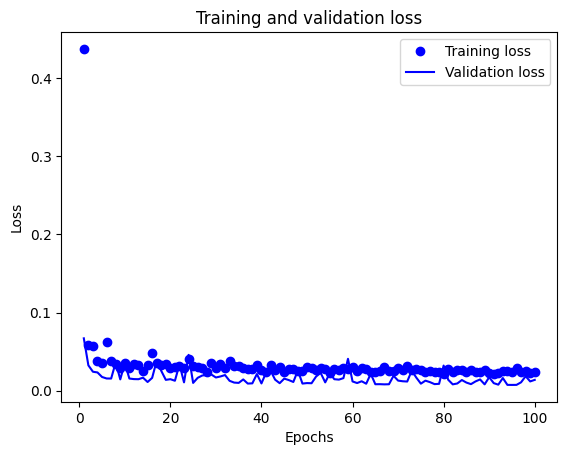

In [29]:
# Visualize the loss
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

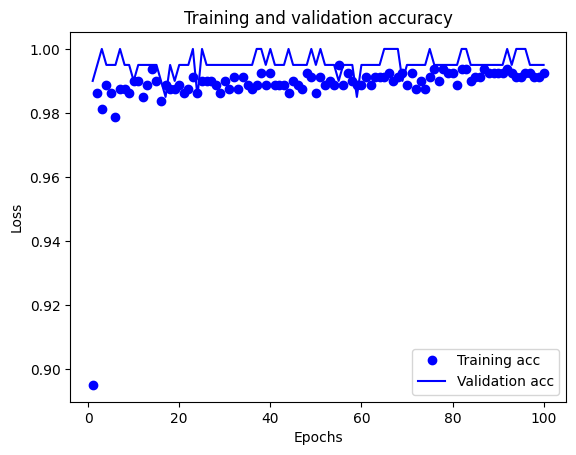

In [30]:
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
results = model.evaluate(X_test, one_hot_y_test)
print(results)

7/7 [==============================] - 0s 932us/step - loss: 0.0139 - accuracy: 0.9950
[0.013925089500844479, 0.9950000047683716]


In [39]:
# predict
x_pred = X_test[:10]
y_pred = y_test[:10]
one_hot_y_pred = one_hot_y_test[:10]
print('input')
print(x_pred)
print(y_pred)
print(one_hot_y_pred)
predictions = model.predict(x_pred)
print('prediction')
print(predictions.shape)
print(predictions)
print(np.argmax(predictions, axis=1))

input
[[ 4.66750641  4.48782565]
 [-7.99694858  6.88030244]
 [-6.28009526 -7.85714493]
 [ 3.68326886  1.17667425]
 [-0.1403784  10.16543822]
 [-9.75698382  7.8657782 ]
 [-4.42947989 -8.59962768]
 [-2.1730589   9.03317473]
 [-9.21450004 -7.52228233]
 [-1.40149775  9.27133855]]
[1 3 2 1 0 3 2 0 2 0]
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]
1/1 [==============================] - 0s 14ms/step
prediction
(10, 4)
[[4.98999555e-07 9.99999523e-01 1.42093515e-09 3.18016014e-09]
 [4.47870139e-03 1.38301666e-05 8.20407586e-05 9.95425522e-01]
 [1.19452581e-09 1.90404699e-05 9.99967933e-01 1.29765003e-05]
 [4.02896831e-06 9.99994874e-01 7.10692746e-07 3.15974916e-07]
 [9.99821365e-01 1.29475113e-04 2.12335785e-08 4.92619256e-05]
 [6.80592784e-04 1.00846398e-06 1.15441208e-05 9.99306798e-01]
 [1.25597079e-08 7.36492075e-05 9.99897003e-01 2.93112516e-05]
 [9.99568999e-01 1.50521655e-05 1.1871